In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("product_sales.csv")
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [5]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [7]:
df["sales_method"].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [8]:
df["sales_method"] = df["sales_method"].str.replace("email", "Email")
df["sales_method"] = df["sales_method"].str.replace("em + call", "Email + Call", regex=False)

In [9]:
df["sales_method"].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [10]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [11]:
df["null"] = df["revenue"].isna()


<AxesSubplot:xlabel='sales_method', ylabel='years_as_customer'>

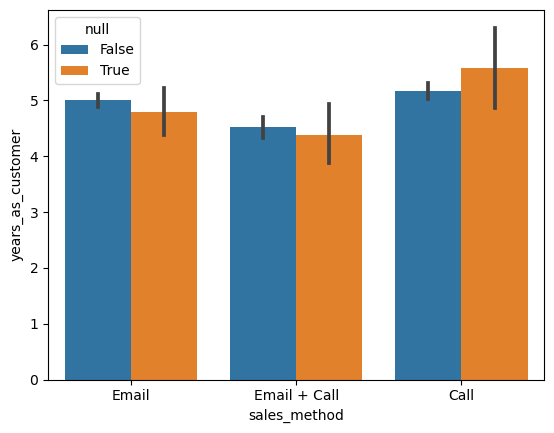

In [12]:
sns.barplot(data=df, x="sales_method", y="years_as_customer", hue="null")

<AxesSubplot:xlabel='sales_method', ylabel='nb_sold'>

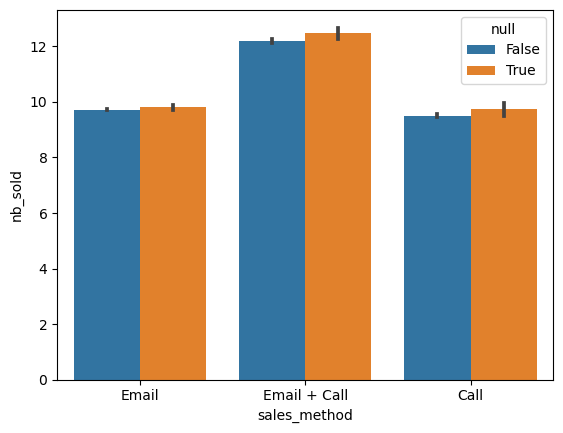

In [13]:
sns.barplot(data=df, x="sales_method", y="nb_sold", hue="null")

<AxesSubplot:xlabel='sales_method', ylabel='nb_site_visits'>

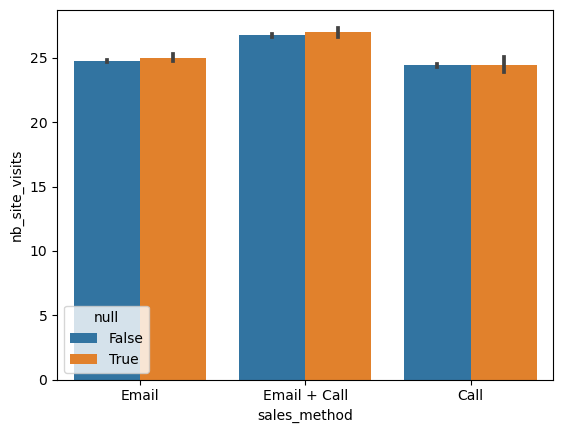

In [14]:
sns.barplot(data=df, x="sales_method", y="nb_site_visits", hue="null")

In [15]:
df.dropna(inplace=True)

In [16]:
df.drop(columns="null", inplace=True)

In [17]:
df = df[df["years_as_customer"] < 2023-1984]
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
...,...,...,...,...,...,...,...,...
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia


In [18]:
df["customer_id"].nunique()

13922

In [19]:
df["sales_method"].value_counts()

Email           6919
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

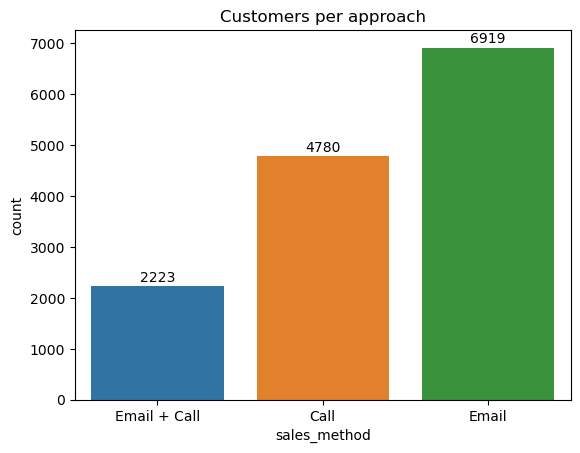

In [20]:
ax = sns.countplot(data=df, x="sales_method")
ax.set(title="Customers per approach")
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height + 100, # y-coordinate position of data label, padded 0.2 above bar
 s = "{:.0f}".format(height), # data label, formatted to ignore decimals
 ha = "center") # sets horizontal alignment (ha) to center

In [21]:
df.pivot_table(columns="sales_method", index="week", values="revenue", aggfunc="mean")

sales_method,Call,Email,Email + Call
week,,,
1,35.350243,87.497166,128.895649
2,43.602606,100.140320,154.246959
3,41.759528,92.762573,150.423272
4,51.447061,108.877141,180.822633
5,53.146087,108.892313,187.588343
6,66.166089,130.976519,227.770635


In [22]:
df.groupby("sales_method")["revenue"].mean().reset_index()

,sales_method,revenue
0,Call,47.596866
1,Email,97.128734
2,Email + Call,183.651233


In [23]:
df.groupby("sales_method")["revenue"].sum()

sales_method
Call            227513.02
Email           672033.71
Email + Call    408256.69
Name: revenue, dtype: float64

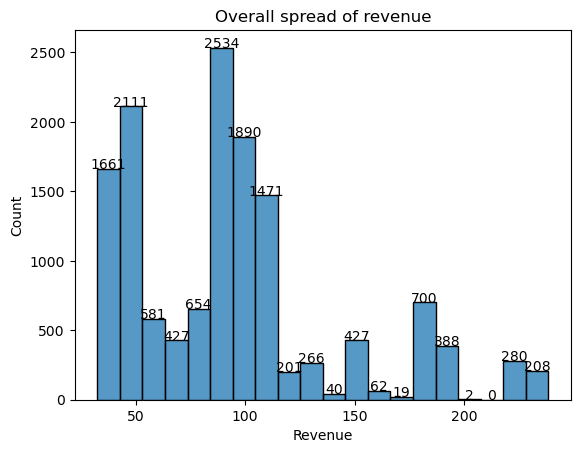

In [24]:
ax = sns.histplot(data=df, x="revenue", bins=20)
ax.set(title="Overall spread of revenue")
plt.xlabel("Revenue")
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height + 0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = "{:.0f}".format(height), # data label, formatted to ignore decimals
 ha = "center") # sets horizontal alignment (ha) to center

Text(0.5, 1.0, 'Spread of revenue per sales method')

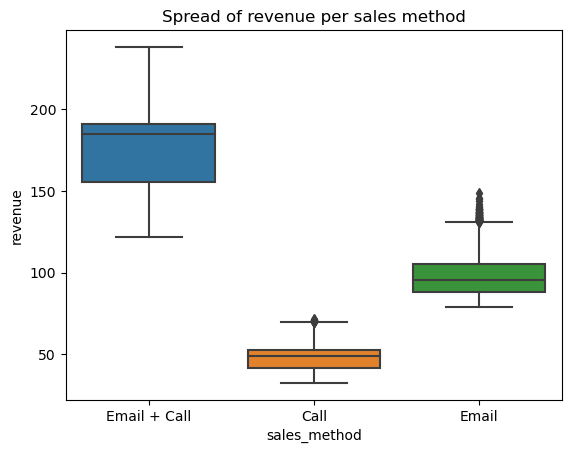

In [25]:
sns.boxplot(data=df, x="sales_method", y="revenue")
plt.title("Spread of revenue per sales method")

Text(0.5, 0, 'Revenue')

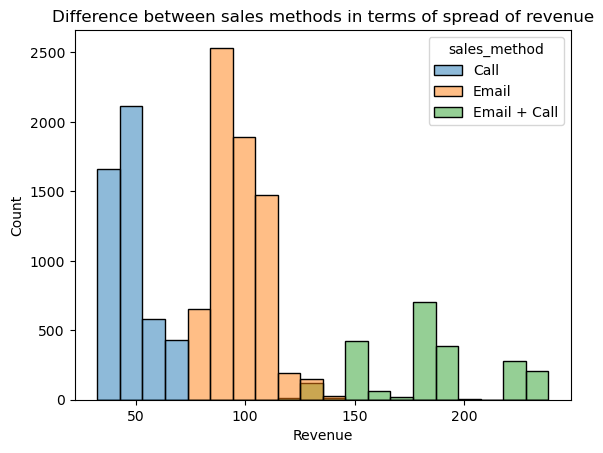

In [26]:
ax = sns.histplot(df.pivot(columns='sales_method', values='revenue'), alpha=0.5, bins=20)
ax.set(title="Difference between sales methods in terms of spread of revenue")
plt.xlabel("Revenue")


In [27]:
dfg = df.groupby(["week", "sales_method"])["nb_sold", "revenue", "nb_site_visits"].count().reset_index()
dfg

C:\Users\Emre Can\AppData\Local\Temp\ipykernel_2408\2977697490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df.groupby(["week", "sales_method"])["nb_sold", "revenue", "nb_site_visits"].count().reset_index()


,week,sales_method,nb_sold,revenue,nb_site_visits
0,1,Call,740,740,740
1,1,Email,2625,2625,2625
2,1,Email + Call,131,131,131
3,2,Call,775,775,775
4,2,Email,1375,1375,1375
5,2,Email + Call,171,171,171
6,3,Call,868,868,868
7,3,Email,1065,1065,1065
8,3,Email + Call,324,324,324
9,4,Call,963,963,963


In [28]:
dfg = df.groupby(["week", "sales_method"])["nb_sold", "revenue", "nb_site_visits"].sum().reset_index()
dfg

C:\Users\Emre Can\AppData\Local\Temp\ipykernel_2408\3763777258.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df.groupby(["week", "sales_method"])["nb_sold", "revenue", "nb_site_visits"].sum().reset_index()


,week,sales_method,nb_sold,revenue,nb_site_visits
0,1,Call,5239,26159.18,15912
1,1,Email,22917,229680.06,61790
2,1,Email + Call,1133,16885.33,3076
3,2,Call,6823,33792.02,18498
4,2,Email,13837,137692.94,34586
5,2,Email + Call,1722,26376.23,4280
6,3,Call,7177,36247.27,19919
7,3,Email,9873,98792.14,25911
8,3,Email + Call,3244,48737.14,7988
9,4,Call,9831,49543.52,24539


Text(0.5, 1.0, 'Revenue totals per sales method')

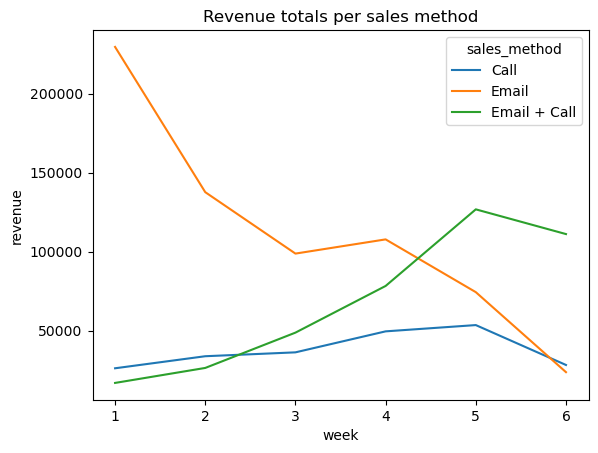

In [29]:
sns.lineplot(data=dfg, x="week", y="revenue", hue="sales_method")
plt.title("Revenue totals per sales method")

Text(0, 0.5, 'Number of products')

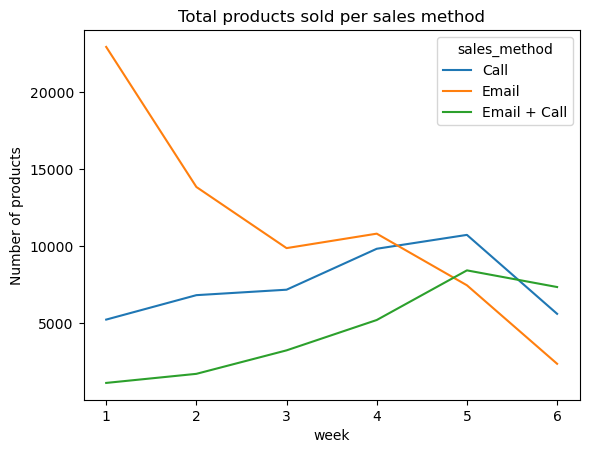

In [30]:
sns.lineplot(data=dfg, x="week", y="nb_sold", hue="sales_method", hue_order=["Call", "Email", "Email + Call"])
plt.title("Total products sold per sales method")
plt.ylabel("Number of products")

<AxesSubplot:xlabel='week', ylabel='nb_site_visits'>

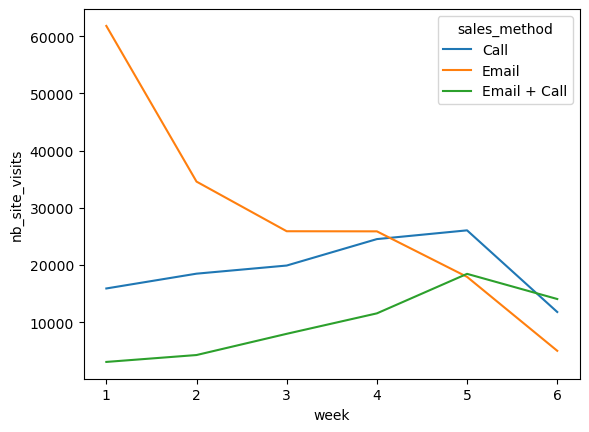

In [31]:
sns.lineplot(data=dfg, x="week", y="nb_site_visits", hue="sales_method")

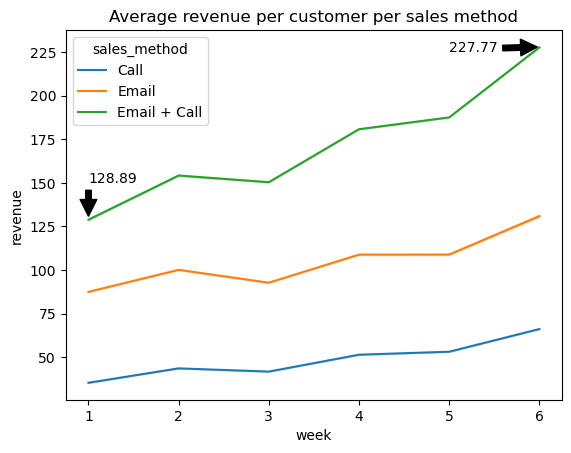

In [32]:
ax = sns.lineplot(data=df, x="week", y="revenue", hue="sales_method", hue_order=["Call", "Email", "Email + Call"])
ax.set(title="Average revenue per customer per sales method")
ax.annotate("128.89", xy=(1, 130), xytext=(1, 150),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate("227.77", xy=(6, 228), xytext=(5, 225),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

<AxesSubplot:>

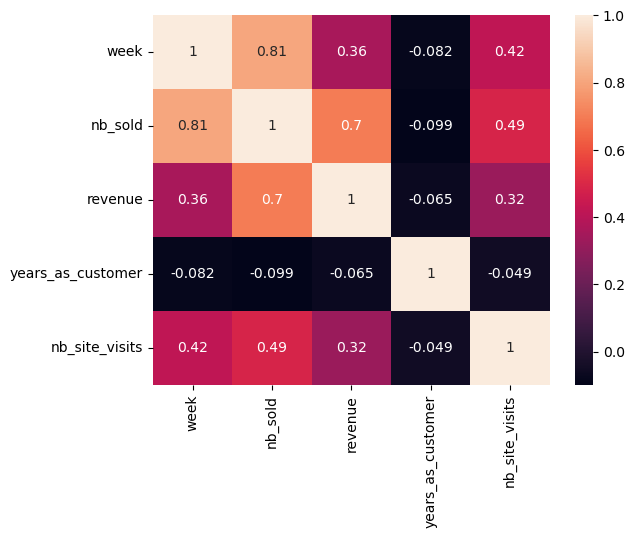

In [33]:
sns.heatmap(df.corr(), annot=True)